# First phase practice project -- Fliprobo

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


# Red wine quality project

In [66]:
#Red wine quality project
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [67]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [68]:
df.shape

(1599, 12)

In [69]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [70]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [71]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

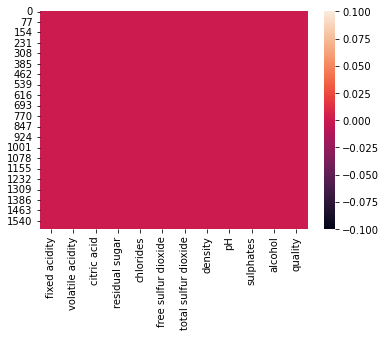

In [72]:
sns.heatmap(df.isnull())

there is no missing data here.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [74]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [75]:
df['sulphates'].unique()

array([0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8 , 0.54, 0.52, 1.56,
       0.88, 0.93, 0.75, 1.28, 0.5 , 1.08, 0.53, 0.91, 0.63, 0.59, 0.55,
       0.66, 0.6 , 0.73, 0.48, 0.83, 0.51, 0.9 , 1.2 , 0.74, 0.64, 0.77,
       0.71, 0.62, 0.39, 0.79, 0.95, 0.82, 1.12, 1.14, 0.78, 1.95, 1.22,
       1.98, 0.61, 1.31, 0.69, 0.67, 0.7 , 0.49, 0.92, 2.  , 0.72, 1.59,
       0.33, 1.02, 0.97, 0.85, 0.43, 1.03, 0.86, 0.76, 1.61, 1.09, 0.84,
       0.96, 0.45, 1.26, 0.87, 0.81, 1.  , 1.36, 1.18, 0.89, 0.98, 1.13,
       1.04, 1.11, 0.99, 1.07, 0.44, 1.06, 1.05, 0.42, 1.17, 1.62, 0.94,
       1.34, 1.16, 1.1 , 0.4 , 1.15, 0.37, 1.33, 1.01])

In [76]:
for i in df.columns:
    print (df[i].value_counts())
    print('\n')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

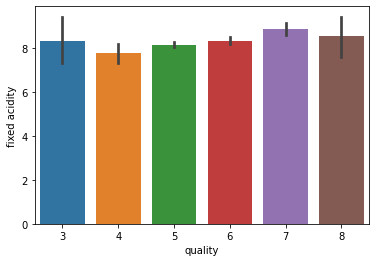

In [77]:
#fixed acidity Vs quality

plt.figure()
sns.barplot(x = 'quality', y = 'fixed acidity',data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

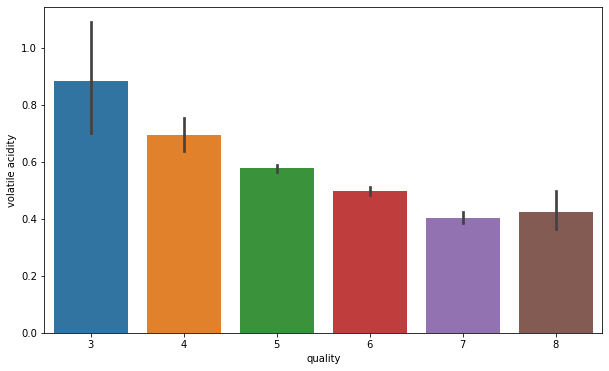

In [78]:
#volatile acidity Vs quality

plt.figure(figsize = (10,6))
sns.barplot(x='quality',y='volatile acidity', data = df)

There is a downward trend. 

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

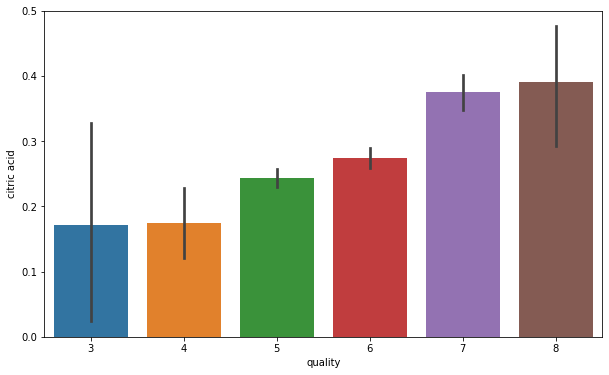

In [79]:
# citric acid vs quality

plt.figure(figsize = (10,6))
sns.barplot(x = 'quality',y = 'citric acid', data = df)

There is a increasing trend in the graph 

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

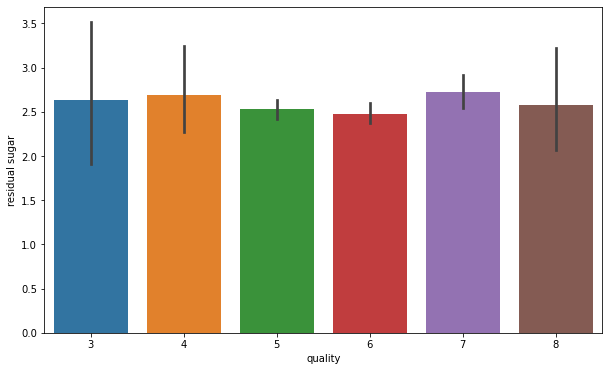

In [80]:
## residual sugar vs quality

plt.figure(figsize=(10,6))
sns.barplot(x='quality',y = 'residual sugar',data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

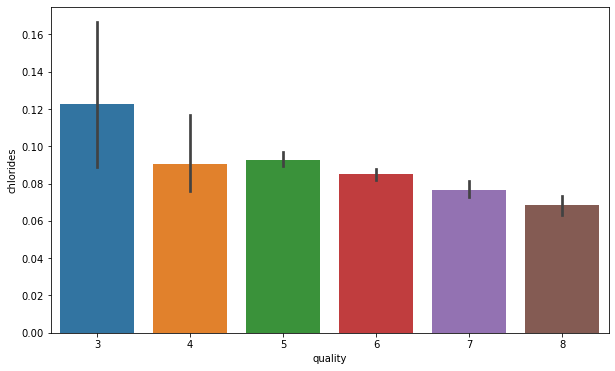

In [81]:
# chlorides	 vs quality

plt.figure(figsize = (10,6))
sns.barplot(x= 'quality',y = 'chlorides',data = df)

There is a downward trend

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

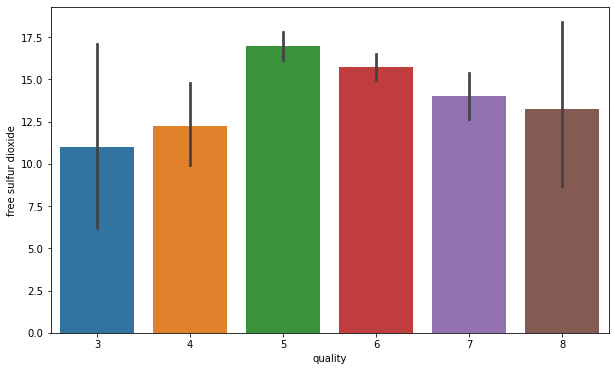

In [82]:
#free sulfur dioxide vs quality

plt.figure(figsize = (10,6))
sns.barplot(x = 'quality',y = 'free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

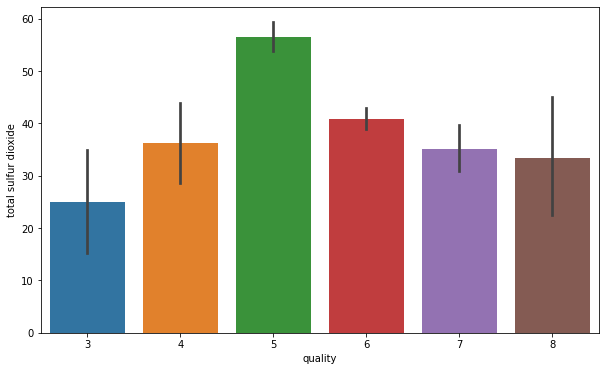

In [83]:
#total sulfur dioxide vs quality

plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='density'>

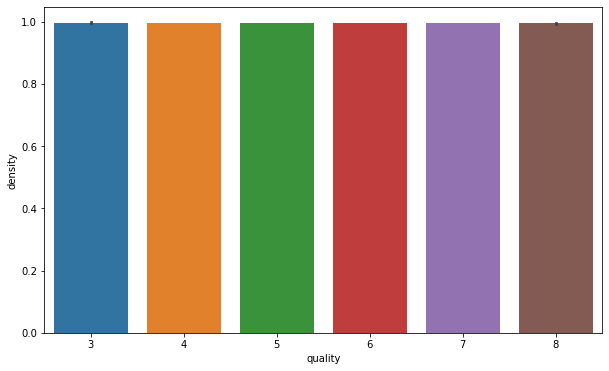

In [84]:
#density vs quality

plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density',data = df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

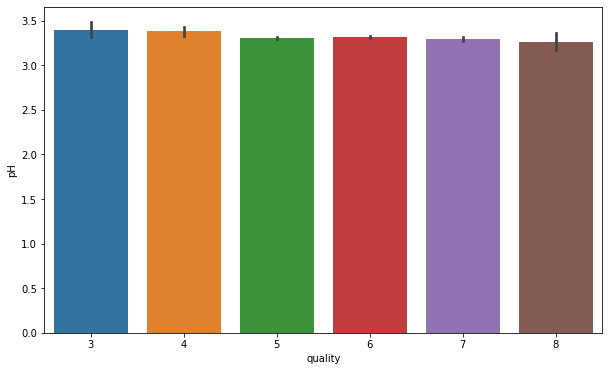

In [85]:
#pH vs quality

plt.figure(figsize = (10,6))
sns.barplot(x = 'quality',y = 'pH',data = df)

Slight downward trend

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

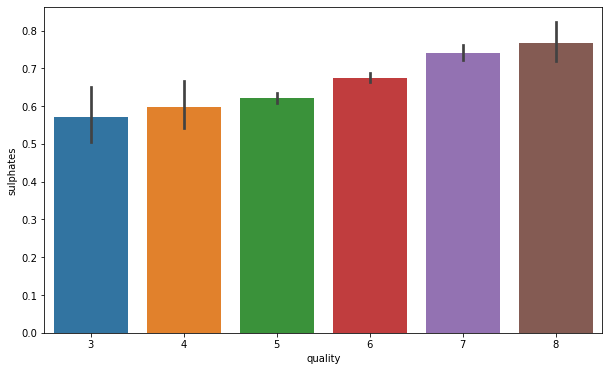

In [86]:
#sulphates vs quality

plt.figure(figsize = (10,6))

sns.barplot(x = 'quality',y = 'sulphates',data = df)

slight increasing trend

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

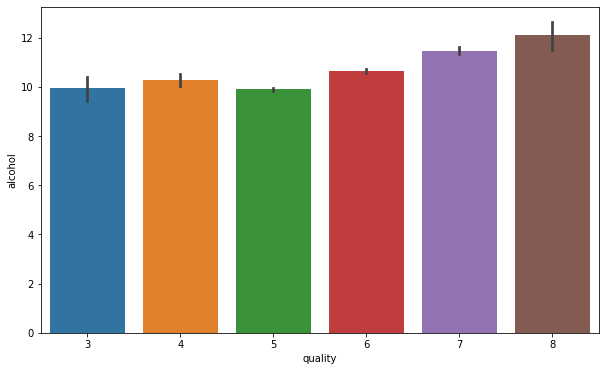

In [87]:
#alcohol vs quality

plt.figure(figsize = (10,6))
sns.barplot(x = 'quality',y = 'alcohol',data = df)

increaing trend

# Determining the Data 

In [88]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [89]:
#wine quality classification good or bad
# Good =1 ranges from (7 and above)
# Bad = 0 ranges from (3 to 6)

df['quality'] = df['quality'].apply(lambda x:1 if x >=7 else 0)

In [90]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


0    1382
1     217
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

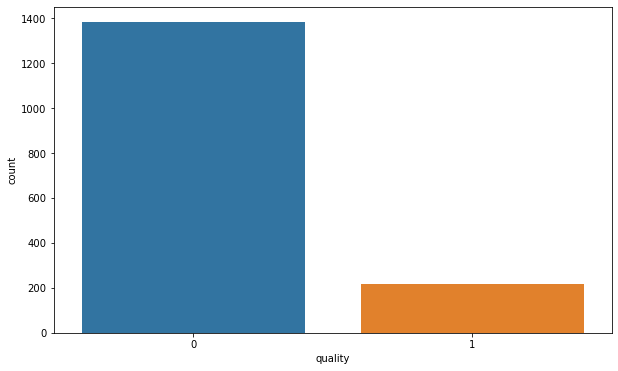

In [91]:
print(df['quality'].value_counts())

plt.figure(figsize=(10,6))
sns.countplot(df['quality'])

In [92]:
#seperating dependant and independant variables

x = df.iloc[:, :-1].values

y = df.iloc[:,-1].values

In [93]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [94]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
# Splitting into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state = 42)
print("X-train Shape: ", x_train.shape)
print("X-test Shape: ", x_test.shape)
print("y-train Shape: ", y_train.shape)
print("y-test Shape: ", y_test.shape)

X-train Shape:  (1279, 11)
X-test Shape:  (320, 11)
y-train Shape:  (1279,)
y-test Shape:  (320,)


In [97]:
# apply standar scaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.fit_transform(x_test)

Creating Algorithms

Random forest Classifier

In [99]:
rf_regressor = RandomForestClassifier(n_estimators = 100)

#fit the classifier with training data
rf_regressor.fit(x_train,y_train)
# predict using classifier
y_pred = rf_regressor.predict(x_test)


[[263  10]
 [ 29  18]]


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 720x432 with 0 Axes>

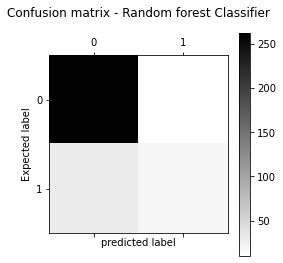

In [100]:
# confusion matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)

# matplot lib for confusion matrix

fig = plt.figure(figsize = (10,6))
plt.matshow(cm,cmap = plt.cm.binary,interpolation = 'nearest')
plt.title('Confusion matrix - Random forest Classifier\n')
plt.colorbar()
plt.ylabel('Expected label')
plt.xlabel('predicted label')
plt.show

In [101]:
print('Total prediction: ',len(y_pred))
print('correct prediction: ',sum(y_pred == y_test))
print('incorrect prediction: ',sum(y_pred != y_test))
print('Accuracy: ',sum(y_pred == y_test)*100/len(y_pred),'%')


Total prediction:  320
correct prediction:  281
incorrect prediction:  39
Accuracy:  87.8125 %


# Medical Cost Personal Insurance Project

In [102]:
Med_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
Med_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [103]:
Med_df.shape

(1338, 7)

In [105]:
Med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [106]:
Med_df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [107]:
Med_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [108]:
Med_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [109]:
Med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [110]:
Med_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [116]:
Med_df['sex'] = Med_df['sex'].map({'female':0,'male':1})

In [117]:
Med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [118]:
Med_df['smoker'] = Med_df['smoker'].map({'yes':1,'no':0})

In [119]:
Med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [120]:
Med_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [121]:
Med_df['region'] = Med_df['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [122]:
Med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [123]:
Med_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [125]:
X = Med_df.drop(['charges'],axis = 1)

In [127]:
Y = Med_df['charges']

In [133]:
#Train test split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [134]:
x_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,3
1285,47,0,24.320,0,0,4
1142,52,0,24.860,0,0,2
969,39,0,34.320,5,0,2
486,54,0,21.470,3,0,3
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,4
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,4
860,37,0,47.600,2,1,1


In [135]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [144]:
lr = LinearRegression()
lr.fit(x_train,y_train)
svm = SVR()
svm.fit(x_train,y_train)
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

 Prediction 

In [145]:
y_pred1 = lr.predict(x_test)
y_pred2 = svm.predict(x_test)
y_pred3 = rf.predict(x_test)
y_pred4 = gr.predict(x_test)

df1 = pd.DataFrame({'Actual': y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [146]:
df1

,Actual,lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,10163.397236,11001.128629
887,5272.17580,7116.295018,9492.515425,5082.689983,5840.174656
890,29330.98315,36909.013521,9648.758701,28271.926313,28001.980112
1293,9301.89355,9507.874691,9555.044136,9859.917773,9745.291602
259,33750.29180,27013.350008,9420.421978,34563.065393,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47246.211160,45431.423211
575,12222.89830,11814.555568,9625.431547,12533.789332,12465.025294
535,6067.12675,7638.107736,9504.168517,6442.743653,6974.336525
543,63770.42801,40959.081722,9605.004594,47084.681178,47862.047791


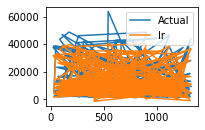

In [150]:
#visualization of the models for better clarity

plt.subplot(221)
plt.plot(df1['Actual'],label = 'Actual')
plt.plot(df1['lr'],label = 'lr')
plt.legend()

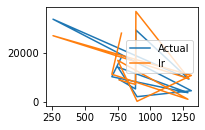

In [152]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[ :11],label = 'Actual')
plt.plot(df1['lr'].iloc[ :11],label = 'lr')
plt.legend()

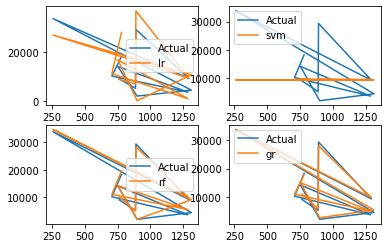

In [155]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[ :11],label = 'Actual')
plt.plot(df1['lr'].iloc[ :11],label = 'lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[ :11],label = 'Actual')
plt.plot(df1['svm'].iloc[ :11],label = 'svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[ :11],label = 'Actual')
plt.plot(df1['rf'].iloc[ :11],label = 'rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[ :11],label = 'Actual')
plt.plot(df1['gr'].iloc[ :11],label = 'gr')
plt.legend()

Evaluating the Algorithm

In [156]:
from sklearn import metrics

In [157]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

print(score1,score2,score3,score4)

0.7833463107364539 -0.07229762787861826 0.8685424084339464 0.8779936181637191


In [158]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

print(s1,s2,s3,s4)

4186.508898366434 8592.428727899724 2454.216064147886 2447.167158715136


MODEL 4 IS MORE ACCURATE

Prediction of new customer charges

In [159]:
data = {'age':40,'sex':1,'bmi':40.31,'children':4,'smoker':1,'region':2}
df = pd.DataFrame(data,index = [0])

In [160]:
df

,age,sex,bmi,children,smoker,region
0,40,1,40.31,4,1,2


In [162]:
#cost of insurance charges

new_pred = gr.predict(df)
print(new_pred)

[43931.13613049]


Saving the model

In [165]:
gr = GradientBoostingRegressor()
gr.fit(X,Y)

GradientBoostingRegressor()

In [166]:
import joblib

In [167]:
joblib.dump(gr,'model_joblib_gr')


['model_joblib_gr']

In [168]:
model = joblib.load('model_joblib_gr')

In [169]:
model.predict(df)

array([42148.361888])

this prediction of charges is more accurate as the data is trained into entire data sheet